# **Motivation for this project:**  
Deciding what to cook every day is challenging, especially when trying to maintain a balanced diet. The abundance of online recipes makes it difficult to find meals that fit specific dietary needs, such as calorie intake and personal health points. This often leads to frustration and unhealthy eating habits.  

Dietary choices significantly impact overall health, influencing conditions like heart disease, diabetes, and obesity. Personalized recipe recommendations can help individuals stick to their nutritional goals while making meal planning easier. By leveraging data analysis, web scraping, and visualization techniques, this project aims to simplify recipe selection and promote healthier eating habits.

---

# **Goal of the project:**  
1. **Collect and analyze recipe data** from a well-known recipe website using web scraping.  
2. **Provide recipe recommendations** based on calorie count and personal points.  
3. **Visualize key insights** from the dataset, such as calorie distribution and recipe key categories.  
4. **Develop an easy-to-use system** that allows users to find recipes aligning with their dietary goals.  

This project focuses on **structured data extraction, analysis, and visualization** to help users make informed decisions about their meal choices.

---

# **Analysis plan to problem solving:**  

## **Exploratory Data Analysis (EDA)**  
- **Data Collection:** Web scraping of recipes from **Skinnytaste** (first 50 pages) using **BeautifulSoup**.  
- **Data Overview:** Extracting categorical and numerical features like recipe name, image, summary, recipe key, calorie count, and personal points.  
- **Basic Statistics:** Checking data types, missing values, and unique entries in categorical variables.  
- **Data Visualization:**  
  - **Histograms:** Calories distribution, personal points distribution.  
  - **Bar plots:** Recipe key distribution.  
  - **Correlation analysis** to identify relationships between variables.  

## **Data Preprocessing:**  
- **Handling missing values** (e.g., assigning ‘N/A’ tags where needed).  
- **Data Transformation:** Converting calorie counts and personal points into numerical values.  
- **Feature Extraction:** Splitting recipe keys stored as strings into individual categories.  

## **Filtering Recipes Based on Calories and Personal Points:**  
To make the recipe selection process more **user-friendly**, a function has been implemented that allows users to **filter recipes based on calorie and personal points ranges**. The function takes four user inputs:  
- **Minimum and maximum calorie values**  
- **Minimum and maximum personal points**  

The filtered recipes are then **sorted by calorie count**, and the **top 10 results** are displayed with their name, image, calorie content, and summary. This feature helps users quickly find recipes that fit their dietary goals while providing a **more personalized meal selection experience**.

---

# **Conclusion:**  
Several challenges were encountered during **data collection and analysis**, including inconsistent recipe structures, pagination issues, and handling missing values. However, through structured scraping techniques and data processing, these obstacles were addressed.  

This project provided valuable insights into **web scraping, data transformation, and visualization techniques**, contributing to a better understanding of **data-driven solutions for personalized recommendations**. The experience was both technically enriching and enjoyable, reinforcing key concepts in **data science and analytics**.


#Installing Required Libraries

In [ ]:
pip install requests beautifulsoup4 pandas


#Importing Necessary Modules


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time


#Defining Base URL and Initializing Lists for Recipe Links and Images

In [ ]:
base_url = "https://www.skinnytaste.com/recipe-index/?_paged="
recipe_links = []
image_link = []


for page in range(1, 51):
    url = f"{base_url}{page}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    recipes = soup.find_all('div', class_='post-thumb-img-content post-thumb')

    for recipe in recipes:
      link = recipe.find('a')['href']
      recipe_links.append(link)
      image_url = recipe.find('img', class_='attachment-teaser size-teaser wp-post-image')['src']
      image_link.append(image_url)

    time.sleep(1)

print(f"Total recipes found: {len(recipe_links)}")
print(f"Total images found: {len(image_link)}")

Total recipes found: 1000
Total images found: 1000


#Displaying First Few Recipe Links


In [ ]:
for i in range(min(10, len(recipe_links))):
    print(f"Recipe {i+1}: {recipe_links[i]}")

Recipe 1: https://www.skinnytaste.com/free-7-day-healthy-meal-plan-sept-30-oct-6/
Recipe 2: https://www.skinnytaste.com/freezer-breakfast-burritos/
Recipe 3: https://www.skinnytaste.com/crustless-pumpkin-pie/
Recipe 4: https://www.skinnytaste.com/red-curry-salmon/
Recipe 5: https://www.skinnytaste.com/apple-butter-recipe/
Recipe 6: https://www.skinnytaste.com/roasted-delicata-squash/
Recipe 7: https://www.skinnytaste.com/applesauce-nut-bread/
Recipe 8: https://www.skinnytaste.com/autumn-salad-with-pears-and-gorgonzola/
Recipe 9: https://www.skinnytaste.com/sesame-chicken/
Recipe 10: https://www.skinnytaste.com/bacon-in-the-oven/


#Re-importing Necessary Modules & extracting data

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from urllib.parse import urlparse, parse_qs


data = []

for link, image in zip(recipe_links, image_link):
    response = requests.get(link)
    soup = BeautifulSoup(response.content, 'html.parser')

    try:
        name = soup.find('h1', class_='entry-title').text
        summary = soup.find('p').text.strip()
        calories_tag = soup.find('span', class_='recipe-meta-value value-calories')
        calories = calories_tag.text.strip() if calories_tag else 'N/A'

        personal_points_tag = soup.find('span', class_='recipe-meta-value recipe-ww-pp icon')
        personal_points = personal_points_tag.text.strip() if personal_points_tag else 'N/A'

        recipe_key_elements = soup.find('ul', class_='cat-icons post-icons')
        if recipe_key_elements:
            recipe_key = ' '.join([element.text.strip() for element in recipe_key_elements.find_all('a')])
        else:
            recipe_key = 'N/A'

        data.append({
            'Name': name,
            'Image': image,
            'Calories': calories,
            'Personal Points': personal_points,
            'Summary': summary,
            'Recipe Key': recipe_key,
        })

    except Exception as e:
        print(f"Error occurred for {link}: {e}")

    time.sleep(1)


df = pd.DataFrame(data)
df.to_csv('skinnytaste_recipes.csv', index=False)
print("Data saved to skinnytaste_recipes.csv")



Data saved to skinnytaste_recipes.csv


#Displaying DataFrame

In [ ]:
df

,Name,Image,Calories,Personal Points,Summary,Recipe Key
0,Free 7 Day Healthy Meal Plan (Sept 30-Oct 6),https://www.skinnytaste.com/wp-content/uploads...,N/A,N/A,"A free 7-day, flexible weight loss meal plan i...",N/A
1,Breakfast Burritos,https://www.skinnytaste.com/wp-content/uploads...,Cals: 261,5,These freezer breakfast burritos are stuffed w...,AF FM HF KF MP Q
2,Crustless Pumpkin Pie,https://www.skinnytaste.com/wp-content/uploads...,Cals: 124.5,2,"Skip the crust and make this easy gluten-free,...",DF GF HF V
3,Red Curry Salmon,https://www.skinnytaste.com/wp-content/uploads...,Cals: 349,6,Thai-inspired Red Curry Salmon is simmered in ...,DF GF HP
4,Apple Butter,https://www.skinnytaste.com/wp-content/uploads...,Cals: 34,1,This easy apple butter recipe simmers on the s...,DF GF KF V
...,...,...,...,...,...,...
995,Cream of Broccoli Soup,https://www.skinnytaste.com/wp-content/uploads...,Cals: 150,4,Cream of Broccoli Soup is a favorite of comfor...,GF KF LC Q V
996,Cilantro-Lime Fish Tacos,https://www.skinnytaste.com/wp-content/uploads...,Cals: 310,5,These easy Cilantro Lime Fish Tacos are made w...,GF HF KF Q
997,Kale and Potato Soup with Turkey Sausage,https://www.skinnytaste.com/wp-content/uploads...,Cals: 232,5,Kale and Potato Soup with Turkey Sausage is an...,DF FM GF HF KF MP W
998,Banana Foster Crepes,https://www.skinnytaste.com/wp-content/uploads...,Cals: 185,6,Banana Foster Crepes combine two of my favorit...,DF GF KF V


# Getting Recipe Key Count

In [ ]:

from collections import defaultdict

recipe_key_count = defaultdict(int)


for recipe in data:
    recipe_keys = recipe['Recipe Key'].split()
    for key in recipe_keys:
        recipe_key_count[key] += 1


for key, count in recipe_key_count.items():
    print(f"{key}: {count}")


N/A: 52
AF: 107
FM: 143
HF: 245
KF: 515
MP: 152
Q: 460
DF: 442
GF: 700
V: 406
HP: 213
LC: 274
W: 121
SC: 29
PC: 34


# Feature Engineering

In [ ]:
import pandas as pd

df = pd.DataFrame(data)


df['Calories'] = df['Calories'].str.replace('Cals: ', '', regex=False)
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')

df['Personal Points'] = pd.to_numeric(df['Personal Points'], errors='coerce')

df = df.dropna(subset=['Calories', 'Personal Points'])

df.head()


,Name,Image,Calories,Personal Points,Summary,Recipe Key
1,Breakfast Burritos,https://www.skinnytaste.com/wp-content/uploads...,261.0,5.0,These freezer breakfast burritos are stuffed w...,AF FM HF KF MP Q
2,Crustless Pumpkin Pie,https://www.skinnytaste.com/wp-content/uploads...,124.5,2.0,"Skip the crust and make this easy gluten-free,...",DF GF HF V
3,Red Curry Salmon,https://www.skinnytaste.com/wp-content/uploads...,349.0,6.0,Thai-inspired Red Curry Salmon is simmered in ...,DF GF HP
4,Apple Butter,https://www.skinnytaste.com/wp-content/uploads...,34.0,1.0,This easy apple butter recipe simmers on the s...,DF GF KF V
5,Roasted Delicata Squash,https://www.skinnytaste.com/wp-content/uploads...,177.0,4.0,"Roasted Delicata Squash with toasted almonds, ...",DF GF V


# Getting the unique Values

In [ ]:
unique_values_count = df.nunique()
print(unique_values_count)

Name               938
Image              938
Calories           434
Personal Points     14
Summary            938
Recipe Key         426
dtype: int64


#Saving the DataFrame to an Excel File

In [ ]:
!pip install openpyxl
df.to_excel('recipes.xlsx', index=False)

#Displaying Recipe Images from DataFrame

In [ ]:
from IPython.display import display, Image

for index, row in df.iterrows():
    print(row['Name'])
    display(Image(url=row['Image']))


Breakfast Burritos


Crustless Pumpkin Pie


Red Curry Salmon


Apple Butter


Roasted Delicata Squash


Apple Bread


Autumn Salad with Pears and Gorgonzola


Sesame Chicken


Bacon in the Oven


Pumpkin Spice Latte


Homemade Hamburger Helper


Fried Brown Rice


Asian Grilled Chicken


Sweet Potato Salad


Ratatouille


Pretzel Crusted Chicken Tenders


Lemon Vinaigrette


Slow Cooker Beef Stew


Deviled Egg Salad


Shrimp and Rice (Arroz Con Camarones)


Bruschetta Pasta Salad


Watermelon Feta Salad


Coconut Popsicles


Sheet Pan Shrimp with Corn and Tomatoes


Strawberry Yogurt Bark


Broccoli Cauliflower Salad


Juicy Grilled Pork Chops


Grilled Eggplant with Feta


Korean Chicken


Blueberry Zucchini Bread


Green Goddess Dressing


Watermelon Cucumber Granita


High Protein Whipped Cottage Cheese Bowls


Hot Crab Dip


Virgin Mojito (Nojito)


Flounder Piccata


Cucumber Soup


Soy-Marinated Beef and Broccoli Skewers


Lobster Rolls


Shrimp Fajitas


Berry Buckle


Orzo with Bacon, Leeks, Peas, Spinach and Lemon


Grilled Shrimp Tacos with Peach Salsa


Air Fryer Boneless Chicken Thighs


Pan Bagnat


Grilled Skirt Steak and Elote Tacos


Grilled Shrimp


Filipino BBQ Pork Skewers


Grape Tomato Sauce


Korean Beef Recipe


Gallo Pinto


Juicy Lucy (Stuffed Turkey Cheeseburger)


Salad with Berries and Pecans


Grilled Chicken Caprese


Chicken Tikka Masala


Red, White and Blueberry Cheesecake Cupcakes


Nicoise Salad


Slow Cooker Pulled Pork


Greek Orzo Salad


Coconut Chicken Rice Bowl


Fish en Papillote


Eton Mess


Thai Fried Rice


Air Fryer Turkey Meatloaf


Strawberry Rhubarb Crisp


Green Curry Noodles


Green Goddess Potato Salad


Baked Steelhead Trout


Almond Cake


Chicken Saltimbocca


Italian Shrimp Salad


Cream of Asparagus Soup


Ground Turkey Tacos


Braised Brisket with Potatoes and Carrots


Protein Waffles


Pad Thai


Chicken Pasta Primavera


Turmeric Garlic Shrimp with Cabbage-Mango Slaw


Grilled Salmon Bruschetta with Avocado


Chicken Marbella


One Pot Chicken and Orzo


Arugula Salad


Roasted Asparagus


Italian Sub Salad


Lemon-Coconut Almond Cake


Baked Honey-Mustard Ham


Lemon Poppy Seed Cupcakes


Deviled Eggs


Risotto Primavera


Honey Baked Spiral Ham


Crustless Quiche


Spanish Tortilla with Pimenton Aioli


Pea Salad


Corned Beef Hash


Fish Cakes


Crispy Butter Beans


Green Shakshuka


Whole Wheat Irish Soda Bread Muffins


Avocado Egg Salad


Slow Cooker Chicken and Lentil Soup


Crock Pot Corned Beef and Cabbage


Bloody Mary Deviled Eggs


Shrimp Stir Fry


High-Protein Egg Bagel


Cranberry Chicken Salad on Apple Slices 


Butternut Squash Soup


Air Fryer Peanut Curry Tofu with Gingery Cauliflower Rice


Baked Fish Sticks


Chicken Pot Pie Soup


Chicken Florentine


Carrot Banana Protein Smoothie


White Chicken Chili


Chicken Gnocchi Soup


Chocolate Oat Flour Banana Bread


Crock Pot Pasta Sauce with Sausage


Roasted Red Pepper Soup


Penne alla Vodka with Chicken


Korean-Inspired Salmon Rice Bowl


Lentil Bolognese


Ranch Popcorn


Crock Pot Pork Roast


Pesto Salmon


Marry Me Chicken


Mushroom Toast


Crispy Baked Chicken Thighs


BBQ Chicken Tenders in Air Fryer


Cottage Cheese Cheesecake


Smoked Turkey Sausage Breakfast Skillet


Italian Wedding Soup


Garlic Rosemary Beef Tenderloin


Grapefruit-Ginger Kombucha Mocktail


White Bean Crostini


Slow Roasted Salmon


Breakfast Casserole with Spinach and Sausage


Roast Beef


Coconut Cookies


Cacio e Pepe Cheese Crisps


King Crab Legs


Escarole Pasta with Sausage and Peppers


Sugar Plum Baked Brie Bites


Snowman Chocolate Bark


Coconut Macaroons


Slow Cooker Black Eyed Peas with Ham


Spinach-Artichoke Crostini


Cheddar Biscuits


Chewy Chocolate Chip Cookies (Low-Fat)


Oatmeal Chocolate Chip Cookies


The Best Lasagna Recipe


Leftover Turkey Noodle Soup


Leftover Turkey Enchiladas Skillet


Lemon Brussel Sprouts


Corn Casserole


Sweet Potato Gratin


Twice Baked Sweet Potatoes with Marshmallows


Turkey Gravy


Turkey Stock for Gravy


Cornbread Muffins


Make-Ahead Low-Carb Turkey Gravy (Flourless)


Turkey Roulade (Stuffed Turkey Breast)


Sweet Potato Casserole with Marshmallows


Mashed Sweet Potatoes


Roasted Delicata Squash and Brussels Sprouts


Meximelt


Butternut Squash Lasagna (No-Noodle)


Slow Cooker Chicken Enchiladas


Cheesy Baked Pumpkin Pasta


Green Beans with Mushrooms


White Bean Pumpkin Turkey Chili (Slow Cooker or Instant Pot)


Beef Stew


Mummy Hot Dogs


Air Fryer Chicken Bites


Shaved Brussels Sprout Salad with Pears and Pomegranate


Pumpkin Mug Cake


Parmesan Brussel Sprouts


Mummy Jalapeno Poppers


Roasted Pumpkin Seeds


Instant Pot Brown Rice


Autumn Kale Salad with Chicken


Roasted Sweet Potatoes


Minestrone Soup


Pumpkin Chocolate Chip Cookies


Coconut Curry Butternut Squash Soup


Pumpkin Bread Recipe


Roasted Broccoli and Cauliflower


Pumpkin Baked Oatmeal Cups


Apple Turnover


Apple Cobbler Recipe


Instant Pot Rice


Stuffed Shells with Meat Sauce


Chicken Nuggets


Classic Egg Salad


Pumpkin Chocolate Chip Muffins


Banana Bread Recipe


Cinnamon-Raisin Overnight Oats


Orange Chicken


Crispy Oven Roasted Baby Potatoes


Pasta with Creamy Zucchini Sauce


Salisbury Steak Meatballs (Instant Pot, Stove, Slow Cooker)


Mini Quiche


Cauliflower Rice


Air Fryer Chicken Cutlets


Cajun Chicken Pasta


Loaded Baked Potato Soup


Turkey Meatloaf with Zucchini


Babka-Inspired Bagels


Roasted Broccoli with Smashed Garlic


Chicken Stroganoff


Feta Eggs with Zucchini


Air Fryer Fish Sticks


Instant Pot Chicken Noodle Soup


Hummus


Ratatouille with Farro


Shrimp Quesadilla


Zucchini Gnocchi


Strawberry Swiss Roll


Chicken Eggplant Parmesan


Air Fryer Asian Meatballs


Gazpacho


Zucchini Pancakes


Corn Salsa


Zucchini Bread


Spicy Salmon Sushi Pizza


Air Fryer Pork Chops


Pupusas


Waffled Zucchini Fritters


BBQ Chicken


Homemade Ferrero Rocher (Hazelnut) Date Balls


Grilled Pesto Chicken and Tomato Kebabs


Chicken Burger


Coleslaw Recipe


Grilled Chicken Sandwich


Grilled Pineapple


Mediterranean Meatballs


Smash Tacos


Loaded Egg Muffins


Veggie Kabobs


Chipotle Chicken


Italian Pasta Salad


How To Cook Quinoa


Protein Bagels with Cottage Cheese


Turkey Burger Recipe


Greek Cottage Cheese Bowl


Taco Seasoning Recipe


Mexican-Inspired Grilled Corn Salad with Cotija


Grilled Asparagus


Chicken Summer Rolls


Cheesy Stuffed Chicken Breast with Zucchini


Lamb Keema with Peas


Pickled Red Onions


Macaroni Salad with Tomatoes


How To Grill Corn on The Cob


Blackened Grilled Salmon Skewers


Cilantro Lime Shrimp


The Best Grilled Chicken Breast


Creamy Cucumber Salad


Blueberry Galette


Broccoli and Cheese Egg Muffins


Air Fryer Sweet Potato Fries


Pesto Pasta with Arugula, Asparagus, Peas, and Pistachios


Red Potato Salad


Grilled Potatoes


Lentil Curry


Hot Dog Onions


Creamy Orzo with Asparagus and Peas


High-Protein Cottage Cheese Veggie Dip with Za’atar


Artichoke Dip


Spicy Shrimp Francese with Calabrian Chili


Yogurt-Marinated Chicken


English Muffin Breakfast Sandwich


Best Guacamole Recipe


The BEST Chicken Enchilada Recipe


Pico de Gallo


Shrimp Tacos


Greek Tofu Bowls


Angel Hair Pasta with Shrimp and Tomato Cream Sauce


Lasagna Roll Ups With Cottage Cheese


Air Fryer Salmon Patties


Mexican Shrimp Cobb Salad


Roasted Strawberry Almond Flour Muffins


Fiesta Bean Salad


Ground Beef and Broccoli Stir Fry


Roasted Mushrooms with Parmesan


Huevos Pericos


Chicken Satay with Spicy Peanut Sauce


Open Faced Tuna Sandwich with Avocado


Ropa Vieja


Green Smoothie Bowl


Carrot Cake Recipe with Cream Cheese Frosting


Insanely Good Blueberry Oatmeal Muffins


20-Minute Veggie Lo Mein Bowl


Roasted Carrots


Artichoke Pie


Ground Turkey with Potatoes and Spring Peas


Italian Sub Broccoli Salad


5-Ingredient Salmon Salad (easy lunch idea)


Baked Shrimp Parmesan Hero


Parmesan Asparagus Fries


Broiled Tilapia Oreganata


Hash Brown Egg White Nests


Tofu Poke Bowl


Broccoli Cheddar Soup


Baked Salmon Cakes


Classic Chicken Salad Recipe


Turkey Shepherd’s Pie Stuffed Sweet Potato


Filipino Chicken Adobo


Linguini and Shrimp Fra Diavolo


Honey-Mustard Air Fryer Pork Chops


Tropical Chia Pudding Breakfast Bowl (High Protein)


Short Rib Soup (Instant Pot or Stove)


30-Minute Shrimp, Peas and Rice


Honey Sriracha Roasted Salmon Rice Bowls (GF, DF)


Wild Mushroom and Farro Soup


Cabbage Soup with Chicken and Pork


Spicy Gochujang Tofu Bowl (Vegan, Gluten-Free)


Air Fryer Salmon with Maple Soy Glaze (5 Ingredients)


Chicken Divan


Air Fryer Breaded Cubed Steak


Chicken Tenders Parmesan


Perfect Filet Mignon for Two


High Protein Egg White Muffins with Turkey Bacon


Buffalo Chicken Dip


Chocolate Brownie Date Balls


Baked Buffalo Chicken Jalapeño Poppers


Buffalo Chicken Lettuce Wraps (Slow Cooker, Instant Pot)


Loaded Nachos with Ground Turkey, Beans and Cheese


Air Fryer Egg Salad


Stuffed Buffalo Chicken Breasts


5-Minute Microwave Salmon Rice Bowl with Bok Choy


Pasta Fagioli (Pasta and Beans)


Buffalo Chicken Meatballs


Raw Beet Salad with Apples and Carrots


Teriyaki Shrimp Quinoa Bowls with Mango-Cucumber Salsa


Black Beans and Rice


Tortilla Encrusted Chicken Tenders


Air Fryer Breakfast Banana Split


Red Thai Coconut Curry Shrimp


Ground Turkey Skillet with Sweet Potatoes and Black Bean


Avgolemono Chicken and Rice Soup


Pavlova


Broccoli Salad


Braised Kale with Pancetta


White Bean Scampi with Linguine


Borscht


Zoats or Zucchini Oats


Chicken Stuffed Peppers with White Beans


Perfect Air Fryer Shrimp


Skillet French Onion Chicken


Juicy Oven Baked Chicken Breast


Salmon Caesar Salad


Spicy Hearts of Palm Noodle Stir Fry with Ground Chicken


Buffalo Chicken Rice Bowls


Breaded Shrimp


Whipped Feta Dip


Spinach Dip Stuffed Mushrooms


Breakfast Strata with Sausage and Mushrooms


Slow Cooker Steel Cut Oats


One-Pot Orzo with Sausage, Spinach and Corn


Healthy Chocolate Chip Oat Cookies


Veggie Stromboli with Mushroom, Spinach and Mozzarella


Spinach Prosciutto and Mozzarella Stuffed Pork Tenderloin


Butternut Squash Galette


Buttermilk Marinated Air Fryer Whole Chicken


Bacon Spinach Breakfast Casserole with Gruyère Cheese


Rainbow Quinoa Salad with Lemon Dressing


Greek Yogurt Caesar Dip


Spicy Vodka Chicken Parmesan


Oysters Rockefeller


Fennel Gratin


Savory Steel Cut Oatmeal


Asian Chicken Lettuce Wraps


Air Fryer Chicken Thighs


High-Protein Zucchini Omelet for One


Tortilla Soup


Stuffed Butternut Squash with Wild Rice and Sausage


Kale and Brussels Sprout Salad with Parmesan and Pecans


Sheet Pan Thanksgiving Dinner for Four


Cornbread Stuffing


Vanilla Sweet Potato Casserole with Praline Topping


Roasted Butternut Squash with Onions, Bacon, and Parmesan


Garlic Mashed Potatoes


High-Protein Enchilada Scrambled Eggs


Creamy Roasted Acorn Squash Soup


Chicken Parmesan Rolls


Green Bean Casserole


Dairy-Free Heavy Cream


Garlic-Ginger Chicken Stir-Fry


Instant Pot Bolognese Sauce


Sweet Potato Soup with Sausage (Slow Cooker, Instant Pot, Stove)


Everything Bagel Pigs in a Blanket


Garlic Butter Mushrooms


Healing Turmeric Chicken Noodle Soup (GF, DF)


Apple Pie Overnight Oats


Avocado Toast with Egg – Four (4) Ways


Black Bean Soup (Freezer Friendly)


Blackened Air Fryer Salmon Bites


Tofu Tacos with Potatoes and Jalapeños


Sweet Potato Turkey Meatloaf


Lemony Hearts of Palm Salad with Avocado


Pizza Sausage Rolls


Korean-Inspired Salmon Tacos with Spicy Slaw


Mexican Layer Dip


Creamy Pumpkin Polenta


Quick Black Beans Recipe


Air Fryer Butternut Squash


Slow Cooker Ground Beef Ragu


Pumpkin Banana Bread


Lox and Eggs with Onions


Fall Brussels Sprout Salad with Apples, Pecans, and Blue Cheese


Turmeric Roasted Sweet Potato and Macadamia Soup


Air Fryer Salmon Fish Sandwich


Potato Leek Soup


Whole Wheat Pumpkin Pancakes with Pecans


Chicken Taco Poblano Rice Bowls


Peanut Butter Banana Muffins


Apple and Grape Fall Fruit Salad


Sheet Pan Baked Feta with Broccolini, Tomatoes and Chickpeas


Maple Roasted Butternut Squash


Pumpkin Cream Cheese Muffins


Creamy Sausage and Potato Soup


Parmesan-Herb Baked Salmon


Pumpkin Overnight Oats


Avocado Toast with Halloumi and Egg


Chicken Enchilada Stuffed Zucchini Boats


15-Minute Protein Chia Seed Cereal


Fish Taco Bowls


Spaghetti and Meatball Soup


Heirloom Tomato Galette


Grilled Chicken Panini with Zucchini, Tomato, and Mozzarella


Chicken Caprese Skillet


Air Fryer Sweet Plantains (Maduros)


Three-Cheese Zucchini Quiche


Raspberry Coconut Chia Pudding Popsicles


Creamy Corn Soup with Queso Fresco


Tuna Tartare


Tortellini Salad


BLT Roll Ups with Turkey and Avocado


Baked Wonton Chips


Lentil Salad


Air Fryer Popcorn Chicken


Homemade Kansas City Style BBQ Sauce


Easy Zucchini Casserole


Pineapple Chia with Cottage Cheese


Scallops with Corn and Tomatoes


Giant Zucchini Parmesan


Corn Tomato Avocado Salad


Peach Pie Cottage Cheese Bowls


Gandules Guisados (Stewed Pigeon Peas)


Puerto Rican Sofrito Recipe


Pollo Sabroso (Broiled or Grilled)


Summer Cavatelli Pasta with Corn, Tomatoes and Zucchini


Bacon-Wrapped Air Fryer Chicken Breast


Black Bean, Avocado, Cucumber and Tomato Salad


Greek 7 Layer Dip


Red, White and Blueberry Trifle


Air Fryer Baked Potato


Chickpea Milanese


Peruvian Grilled Chicken Skewers


Overnight Oats (How To Make)


Broiled Fish with Tomato Caper Sauce


Mango Coconut Chia Pudding


Grilled Chicken Chickpea Salad


Grilled Tuna over Arugula with Lemon Vinaigrette


Watermelon Arugula and Feta Salad


Berry Cottage Cheese Breakfast Bowl


Chili-Lime Air Fryer Salmon


String Beans with Garlic and Oil


Tuna Poke Salad


Arugula Pasta Salad with Chickpeas and Sun Dried Tomatoes (no mayo)


Honey Sriracha Chicken and Broccoli Meal Prep Bowls


Greek Pasta Salad


Sous Vide Chicken Breast and a Cilantro Lime Chicken Avocado Salad


Instant Pot Baked Oatmeal Bars


Seared Scallop Salad with Grapefruit, Arugula and Spinach


Burst Tomato Cottage Cheese Caprese Bowl


Blueberry Frozen Yogurt


Buffalo Chicken Salad


Coconut Chicken Salad with Warm Honey Mustard Vinaigrette


Grilled Vegetable Orzo Pasta Salad


Juicy Turkey Burgers with Zucchini


Italian Turkey Meatballs


Grilled Chicken Tacos with Lettuce Slaw, Avocado and Cotija


Lemon Asparagus Couscous Salad with Tomatoes


Latin Yellow Rice


Slow Cooker Chicken Tacos


Spicy Canned Salmon Rice Bowl


Avocado Quinoa Salad


Swiss Chard Frittata


Salmon Tikka Masala


Warm Salad with Artichoke Hearts, Roasted Peppers, Mozzarella


Air Fryer Empanadas


Instant Pot Risotto with Prosciutto, Peas, and Herbs


Brown Sugar Baked Beans


Chocolate Frozen Yogurt in the Ninja™ CREAMi®


Lemon Cheesecake Yogurt Cups


Blackened Shrimp and Grits


Banana Nut Pancakes


Air Fryer Steak


Peanut Butter Breakfast Oatmeal Bowl


Greek Turkey Meatballs


Blackened Fish with Key Lime Tartar


BBQ Chicken Salad


Roasted Strawberry Banana Bread


Spinach Artichoke Lasagna Roll-ups


Ginger Scallion Fish


Air Fryer Chickpeas


Mushroom Risotto


High-Protein Scrambled Eggs with Cottage Cheese


Sloppy Joe Recipe


Tuna Croquettes (Baked or Air Fryer)


Ground Turkey Taco Skillet


Enchilada Turkey Meatloaf


Homemade Italian Turkey Sausage or Chicken Sausage


Escarole and Chickpea Soup with Garlic Toast


Cajun Fried Rice


Peanut Butter Oatmeal Protein Cookies


Meal Prep Breakfast Taco Scramble


Easiest Salsa Verde Chicken (Slow cooker or Instant Pot)


Lobster Bisque


Brothy Lima Beans and Greens (Stove or Instant Pot)


Food Cart-Style Chicken Salad with White Sauce


Chicken Breast with Hot Cherry Peppers


3-Ingredient Strawberries Romanoff


Air Fryer Baked Sweet Potato


Roasted Sweet Potato Black Bean Bowls


Crock Pot Italian Sloppy Joes


Mini Bell Pepper Loaded Turkey “Nachos”


Spinach and Bacon Stuffed Mushrooms


Air Fryer Buffalo Chicken Nuggets


Cream Cheese-Filled Almond Flour Banana Muffins (Gluten-Free)


Jalapeno Poppers


Jalapeno Popper “Nachos”


Pepperoni Pizza Bites


Crustless Potato Jalapeño Quiche


Perfect Baked Potato


Pollo Guisado (Latin Chicken Stew with Olives)


Instant Pot Salsa Chicken


Instant Pot Mashed Potatoes


Chicken Piccata


Colombian Chicken Sancocho (Sancocho de Pollo)


Mushroom-Spinach Scrambled Eggs


Asian Salmon Bowl


Tuna Egg Salad


Spaghetti Squash Crust Pizza


Taco Salad (Perfect for Meal Prep)


Healthy 3-Ingredient Banana Oatmeal Cookies


Black-Eyed Peas with Leftover Ham, Collard Greens and Cabbage


Sausage and Broccoli Rabe Egg Rolls (Air Fryer or Oven)


Chilled Calamari Salad with Lemon and Parsley


Drunken Mussels


Baked Oatmeal with Blueberries and Bananas


Scallops over Wilted Spinach Parmesan Risotto


Paprika Smashed Potatoes


Garlic Shrimp


Spaghetti Squash Sausage Lasagna Boats


Waffled Vegetable Latkes


Leftover Turkey Harvest Cobb Salad


Herb and Salt-Rubbed Dry Brine Turkey


Baked Pumpkin Pasta with Pancetta, Gruyere, Kale, and White Beans


Stuffing Recipe


Makeover Spinach Gratin


Roasted Green Beans with Caramelized Onions


Turkey Pot Pie with Sweet Potato Topping


Shredded Brussels Sprouts with Pancetta


Chicken and Broccoli Noodle Casserole


Baked Brie Phyllo Tarts with Craisins and Walnuts


Peanut Butter and Jelly Smoothie


Arugula Salmon Salad with Capers and Shaved Parmesan


Chicken Cassoulet


Quick Beef Chili Recipe (Stove, Slow Cooker or Instant Pot)


Roasted Acorn Squash with Brown Sugar


Drunken Noodles


Turkey Cutlets with Parmesan Crust


Huevos Rancheros


Butternut Squash Ravioli with Sage Butter


Easy Black Bean Vegetarian Chili with Spiced Yogurt


Air Fryer Chicken Milanese with Mediterranean Salad


Salisbury Steak with Mushroom Gravy


Tofu Stir Fry with Vegetables in a Soy Sesame Sauce


Chicken Cutlet Caprese Salad


Strawberry Cheesecake Dip


Beef Stew with Pumpkin


Chicken Romano Meatballs


Chicken Cacciatore


Summer Vegetables with Sausage and Potatoes Skillet (One Pot)


Cilantro Lime Chicken Breast (Grilled or Air Fryer)


Spicy Sriracha Tofu Rice Bowls (Air Fryer or Oven)


Banana Nut Protein Oats


Sausage and Pepper Stromboli (Stuffed Sausage Bread)


Oven Fried Chicken


Portuguese Seafood Stew


Air Fryer Roasted Cauliflower Tacos


Garden Tomato Sauce


Coconut Red Curry Shrimp Skewers


Spice Rubbed Grilled Salmon with Black Beans and Corn


Strawberry Scones


Air Fryer Burst Tomato Burrata Caprese Salad


Cilantro Chicken Salad


Grilled Steak With Tomatoes, Red Onion and Balsamic


Baby Red Potato Salad with Apples


Foil Packet Cheesy Sausage and Peppers


Red White and Blue Fruit Skewers with Cheesecake Yogurt Dip


Mexican Adobo Rubbed Grilled Pork Tenderloin


Grilled Bruschetta Chicken


Caesar-Marinated Chicken Kabobs with Zucchini and Grilled Romaine


Grilled Shrimp Panzanella Skewers


Ground Turkey Skillet with Zucchini, Corn, Black Beans and Tomato


Shrimp Ceviche


Asparagus and Swiss Cheese Frittata


Arroz Congri (Cuban Rice and Black Beans)


Mayo-less Tuna Pasta Salad


Grilled Flank Steak with Black Bean and Corn Salsa


Grilled Chicken, Strawberry, Avocado Salad with Citrus Dressing


Shrimp Egg Rolls (Air Fryer or Baked)


Chicken and Broccoli Recipe


Lobster Roll Pasta Salad


Triple Berry Crisp


Air Fryer Chicken Sandwich with Sriracha Mayo


Ambrosia Fruit Salad


Quinoa Salad with Kale, Cranberries and Mint


Oatmeal Berry Smoothie Bowl


Skillet Cajun Spiced Fish with Tomatoes


Bisteces a la Mexicana (Mexican Style Beef Stew)


Cheeseburger Crunch Wrap


Salmon Fried Rice


Quick and Delicioso Cuban Style Black Beans


Strawberries and Yogurt Whipped Cream


Low-Yolk Egg Salad


Air Fryer Bacon Wrapped Pork Tenderloin


Turkey Picadillo


Farro Salad with Feta, Cucumbers and Sun Dried Tomatoes


Easy (10-minute) Waffled Salmon Cakes


Coconut-Poached Chicken with Bok Choy and Mushrooms


Italian Ground Turkey Meatball Sheet Pan Dinner


Ahi Tuna Poke Stacks


Navel Orange Salad with Avocado


Asparagus and Feta Tartlet with Phyllo Crust


Spring Green Pea Soup with Fresh Herbs


Protein PB & J Smoothie Bowl


Layered Potato Cups with Spring Herbs and Leeks


Spicy Crunchy Tuna Tartare


One-Pot Chicken and Artichoke Cavatappi


Spanakopita Baked Eggs


Cuban Picadillo


Cacio e Pepe Frittata with Cauliflower and Lemony Yogurt


Hearts of Palm Noodle Peanut Stir Fry


Flaugnarde of Mixed Berries (Clafoutis)


Pork Chops and Pears with Spicy Mustard Greens


Air Fryer Lobster Jalapeño Empanadas


Beef Negimaki Stir Fry


Greek Yogurt Caesar Salad Dressing


Sheet Pan Teriyaki Salmon and Vegetables


Cheesy Eggplant Gnocchi Caprese


Buffalo Chickpea Salad


One-Pot Spaghetti Puttanesca


Cottage Cheese Egg and Sausage Frittata


Peanut-Braised Chicken Breasts


Instant Pot Braised Beef


Baked Sweet Potato Egg Cups


Air Fryer Buffalo Chicken Zucchini Skins


Orange Moscow Mule Mocktail


Shrimp Dumpling Lettuce Wraps or Rice Bowls


Savory Cottage Cheese Bowl


Zero-Proof Jalapeño Paloma


Baby Greens with Goat Cheese, Beets and Candied Pecans


Instant Pot Baked Ziti


Shrimp and Andouille Sheet Pan Dinner


High Protein Bread (Oat Sandwich Rolls)


Harissa Chicken Meatballs


House Special Fried Rice Recipe


Quick Shrimp Pho with Vegetables


Air Fryer Nacho Fries


Carne en Bistec – Colombian Steak with Onions and Tomatoes


Salmon Coconut Curry with Spinach and Chickpeas


Spinach Stuffed Chicken Breast with Tomato and Feta


3-Ingredient Baked Bananas


Air Fryer Chicken Nuggets


Breakfast Egg Rolls


Drunken Shrimp


Virgin Bloody Mary


Sauteed Collard Greens with Bacon


Fudgy Flourless Crinkle Brownie Cookies with Sea Salt


Sheet Pan Shrimp Oreganata


Roasted Delicata Squash with Burrata, Pomegranate and Pistachios


Frenched Rack Of Lamb


Pizzelle Cookies


Caramelized Onion Empanadas (Chilean pequenes)


Yogurt Sheet Pan Pancakes with Mixed Berries


Angel Hair with Shrimp and Asparagus


Lemon Cranberry Scones


Dark Chocolate Peanut Butter Bark


Roasted Radishes with Onions


Butternut Squash Lentil Soup


Chicken Brown Rice Bowl (copycat Zinque’s Le Bowl)


Sausage Stuffing


Apple Cranberry Crumble


Slow Cooker Butternut Squash Pear Soup


Turkey Pot Pie with Stuffing Crust


Smashed Sweet Potatoes


Pumpkin Pistachio Energy Balls


Crustless Sausage and Spinach Quiche


Meatloaf and Brown Gravy


Air Fryer Herbed Buttermilk Roast Chicken Breast


Vegetarian Mushroom Kale Lasagna Rolls


Slow Cooker Chicken Enchilada Stuffed Sweet Potatoes


Honeynut Squash Recipe with Maple and Pecans


Pastrami Reuben Egg Rolls


Detox Vegetable Soup


Pumpkin Pie Dip


Broccoli and Cheese Twice Baked Potatoes


Skinny Pumpkin Snickerdoodles


Sweet and Spicy Glazed Salmon


Mushroom Stroganoff


Lemon Blueberry Buttermilk Sheet Pan Pancakes


Citrus Immunity Shots


Turkey Meatball Tortellini Soup with Spinach


Roasted Seasoned Winter Squash Medley


Spicy Pork Brussels Bowls


Portobello Burger with Mozzarella and Pesto Mayo


Dominican Beans (Habichuelas Guisadas)


Sautéed Zucchini with Plum Tomatoes


Peach Blueberry Crisp


Whipped Ricotta Toast with Roasted Tomatoes


Skillet Mexican Zucchini


Raspberry Yogurt Ice Pops


Cauliflower Gnocchi


Ratatouille Baked Chicken


Chocolate Zucchini Bread


Spaghetti with Chicken and Grape Tomatoes


Easy Blueberry Buttermilk Cake


Greek Turkey Burgers


Crustless Quiche Lorraine


Flourless Chocolate Zucchini Brownies


Foil Packet Spice Rubbed Fish with Watermelon Salsa


Easy Crustless Spinach and Feta Pie


Air Fryer Fried Shrimp Sandwich with Tartar Sauce


Caramelized Onion, Red Pepper and Zucchini Frittata


Salmon Croquettes with Dill Sauce


Grilled Chicken with Spinach and Melted Mozzarella


Gnocchi with Grilled Chicken in Roasted Red Pepper Sauce


The Best Baba Ganoush


Stuffed Zucchini with Sausage


Vegetarian Black Bean Tacos


Grilled Chicken Kabobs with Cucumber Yogurt Sauce


Beef and Broccoli Recipe


Grilled Crab Legs


Zesty Lime Grilled Chicken with Pineapple Salsa


Jamaican Beef Patties


Boozy Watermelon Lime Granita


Omelet Tortilla Breakfast Wrap


Margherita Pizza


Banana Pancake Cereal


Turkey Club


Tuna Noodle Casserole


Clam Chowder Lightened Up


Avocado Mango Salsa


BBQ Chicken Foil Packets


Open-Faced Tuna Melt Sandwich Recipe


Carne Guisada (Latin Beef Stew)


Superfood Triple Berry Chia Pudding


Paprika Chicken Stew


Weeknight Seafood Paella


Skinny Hummingbird Cupcakes


Eggplant Sticks (Baked or Air Fryer)


Spinach and Quinoa Patties


Tuna Salad Endive Wraps


Lightened Up Blueberry Scones


Homemade Rice Pilaf (healthy rice-a-roni)


Sheet Pan Turkey Meatloaf and Broccoli


Instant Pot Cilantro Lime Rice


Instant Pot Refried Beans


Healthy Baked Macaroni and Cheese


Air Fryer Chicken Tenders


Orzo with Zucchini and Tomato


Tropical Mango Blueberry Lassi


Egg Tomato and Scallion Sandwich


Skillet Mixed Berry Buttermilk Cobbler


Hot Cross Buns


Lebanese Lentil Soup


Baked Rice and Peas


Banana Bread Muffin in a Mug


Kale and Butternut Squash Salad with Pears and Almonds


Warm Curry Roasted Sheet Pan Vegetable Salad


Instant Pot Spaghetti and Turkey Meatballs


Harissa Shrimp and Chickpeas


Baby Pasta Shells with Asparagus and Marinara Sauce


Green Apple Lemon Cucumber Ginger Smoothie


Za’atar Roasted Carrot and Chickpea Yogurt Bowls


Broiled Tilapia with Thai Coconut Curry Sauce


Soba Noodle Veggie Stir Fry


Chipotle’s Cilantro Lime Rice


Creamy Shrimp and Celery Salad


Chorizo Breakfast Bowls


Spring Asparagus Risotto


Healthy Cod Fish Tacos


Air Fryer Falafel


Kung Pao Tofu


Sesame Encrusted Chicken Tenders


Spicy Shrimp Fried Rice


Chocolate Pistachio Biscotti


Crock Pot Chicken Taco Chili Recipe


Cheesy Turkey Meatball Skillet


Chicken Barley Soup


Whole Roasted Baby Cauliflower


Air Fryer Bacon-Burger Bites


Pasta with Italian Chicken Sausage, Escarole and Beans


Swedish Meatballs


Mixed Baby Greens with Pomegranate, Gorgonzola and Pecans


Easy Wonton Soup


French Onion Soup


Kielbasa Veggie Sheet Pan Dinner


Low-Carb Turkey Taco Stuffed Avocados


Vegetarian Enchiladas with Butternut Squash and Black Beans


Asian Glazed Drumsticks


Italian Beef and Spinach Meatballs


Lemon-Chili Shrimp Quinoa Bowls


Greek Chicken Meal Prep Rice Bowls


Changua (Colombian Milk and Egg Soup)


Coconut Broth Clams with Lemongrass


Chocolate Chip Cloud Cookies


Strawberry Squares


Arroz Con Pollo – Rice and Chicken


Healthy Breakfast Casserole with Spinach and Feta


One Pan Roasted Potatoes, Sausage and Peppers


Pork Chops with Mushrooms and Shallots


Yogurt Panna Cotta with Macerated Berries


Stuffed Mushrooms with Broccoli Rabe and Sausage


Cacio e Pepe Brussels Sprouts


Easy Healthy Ground Turkey Chorizo


Open Faced Turkey Melts


Creamy Pumpkin Ginger Soup


Butternut Squash Mac and Cheese


Kale Salad with Quinoa and Cranberries


Sweet Potato Pie


Whole Roasted Chicken with Lemon and Rosemary


Stuffing Muffins


Baked Turkey Croquettes


Scalloped Potato Gratin


Mashed Sweet Potatoes Brulee


Cauliflower “Mac” and Cheese


Baked Chicken Thighs with Brussels and Sweet Potato


Air Fryer Turkey Breast


Cranberry Pear Sauce


Macaroni and Cheese Soup with Broccoli


Baked Apple Cider Chicken and Cabbage


Banana Nut Bread


Kalyn’s Stuffed Cabbage Casserole


Slow Cooker French Dip Sandwich with Caramelized Onions


Spaghetti with Butternut Leek Parmesan Sauce


Pumpkin Butter


Cinnamon Apple Yogurt Bowls


Spaghetti Carbonara


Crock Pot Picadillo


Creamy Roasted Cauliflower Chowder


Prosciutto Wrapped Figs with Blue Cheese (Grill or Air Fryer)


Turmeric Roasted Chicken and Sweet Potatoes


Parmesan Crusted Delicata Squash


Instant Pot Indian Chicken Pulao


Pumpkin Roll


Eggplant and Tomato Sauce


Air Fryer Scallops with Bacon


Pork Carnitas (Slow Cooker Mexican Pulled Pork)


Mashed Cauliflower


Baked Oatmeal Recipe with Pears Bananas and Walnuts


Baked Sweet Potato (How To Bake Sweet Potatoes)


Garlic Lovers Roast Beef


Spinach Tortellini en Brodo (in Broth)


Mango-Raspberry Fruit Roll Ups


Caprese Salad


Wilted Baby Spinach with Garlic and Oil


Lemon-Parsley Foil Packet Potatoes


Houston’s Veggie Burger


Air Fryer Shishito Peppers


Burma Superstar Chicken Dal Curry


Spicy Tuna Poke Bowl


Basil Oil


Orecchiette with Sausage and Broccoli Rabe


Chicken Zucchini Stir Fry


How To Make Perfect Instant Pot Quinoa


Lighter Eggplant Parmesan


Southwestern Black Bean, Quinoa and Mango Salad


Baked Crab and Corn Cakes


Tzatziki Fish Tacos


Buffalo Shrimp Lettuce Wraps


Air Fryer Chicken Milanese with Baby Arugula


Bruschetta with Tomato and Basil


Perfectly Grilled Zucchini Recipe


Grilled Vegetable Platter with Yogurt Mint Sauce


Zesty Lime Shrimp and Avocado Salad


Breakfast BLT


Mexican Shrimp Diablo


Salmon Avocado Salad


Campfire Dinner Meatloaf Foil Packets


Chicken Chimichangas


Chickpea Salad with Cucumbers and Tomatoes


Air Fryer Chicken Breast


Air Fryer Asian-Glazed Boneless Chicken Thighs


Taco Stuffed Zucchini Boats


Grilled Cumin Spiced Pork Tenderloin


Vegan Caesar Salad


Pineapple Shrimp Fried Rice


Air Fryer Cajun Shrimp Dinner


California Grilled Chicken Avocado and Mango Salad


Parmesan-Basil Air Fryer Salmon (or Baked)


Potato and Green Bean Salad


Mediterranean Sea Bass


Everything Parmesan Crisps


Green Detox Soup with Toasted Hemp Gremolata


Air Fryer Hard Boiled Eggs


Crispy Avocado Egg Rolls (Air Fryer or Oven)


Smoked Salmon Breakfast Flatbread


Ranch Chicken Salad


Key Lime Yogurt Pie


Chicken Parmesan Lasagna


Thin Tortilla Pizza


Tex Mex Migas


Chicken and Asparagus Lemon Stir Fry


The Best Turkey Meatloaf Recipe


BBQ Chicken Quesadilla


Veggie Ham and Cheese Breakfast Egg Casserole


Honey Lemon Bars with Whole Wheat Shortbread Crust


Heather’s Buddha Bowl


Hard Boiled Eggs


Swiss Chard Eggs Benedict


Apricot-Rum Glazed Spiral Ham


Green Bean Salad


Yogurt Waffles


Sesame Crusted Tuna Steak on Arugula


White Bean Turkey Chili


Shrimp Scampi with Broccoli Orzo


Slow Cooker Split Pea Soup


Broccoli and Cheese Stuffed Chicken (Oven or Air Fryer)


Seattle Smoked Salmon Chowder


Instant Pot Corned Beef and Cabbage


Cream of Broccoli Soup


Cilantro-Lime Fish Tacos


Kale and Potato Soup with Turkey Sausage


Banana Foster Crepes


Instant Pot Chicken Taco Chili


#Installing Visualization Libraries

In [ ]:
pip install matplotlib seaborn


#Importing Visualization Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')

sns.set_context("talk")
sns.set_style("darkgrid")

#Visualizing Calories Distribution using Histogram

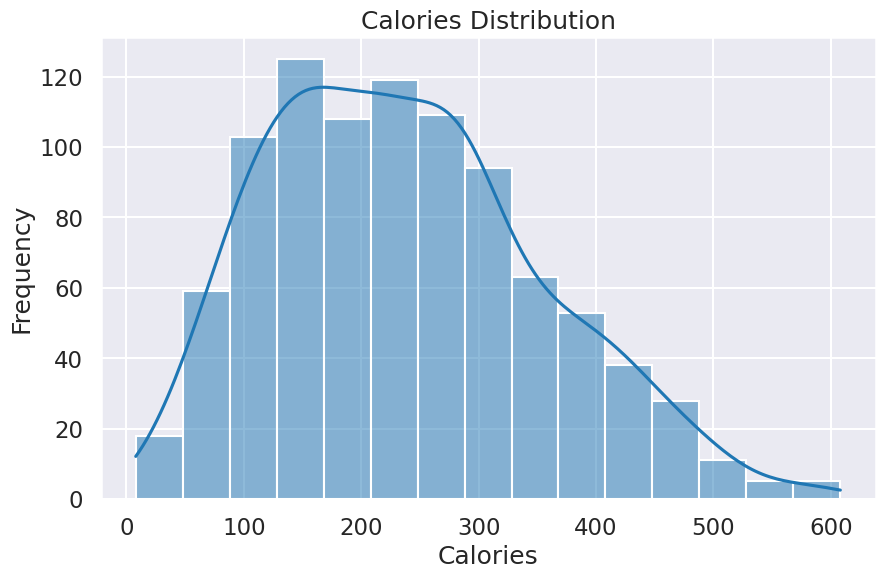

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Calories'].dropna(), bins=15, kde=True)
plt.title('Calories Distribution')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


# Visualizing Recipe Key Count Uisng Barplot

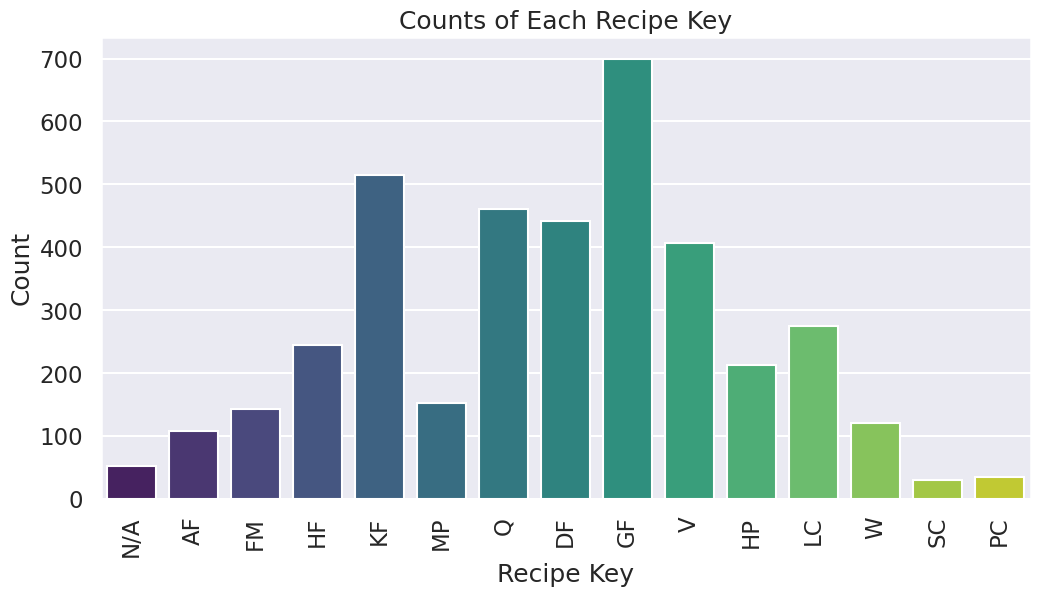

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

recipe_key_df = pd.DataFrame(list(recipe_key_count.items()), columns=['Recipe Key', 'Count'])

plt.figure(figsize=(12, 6))

sns.barplot(x='Recipe Key', y='Count', data=recipe_key_df, palette='viridis')


plt.title('Counts of Each Recipe Key')
plt.xlabel('Recipe Key')
plt.ylabel('Count')

plt.xticks(rotation=90)

plt.show()

# Visualizing Personal Points Distribution using Histogram

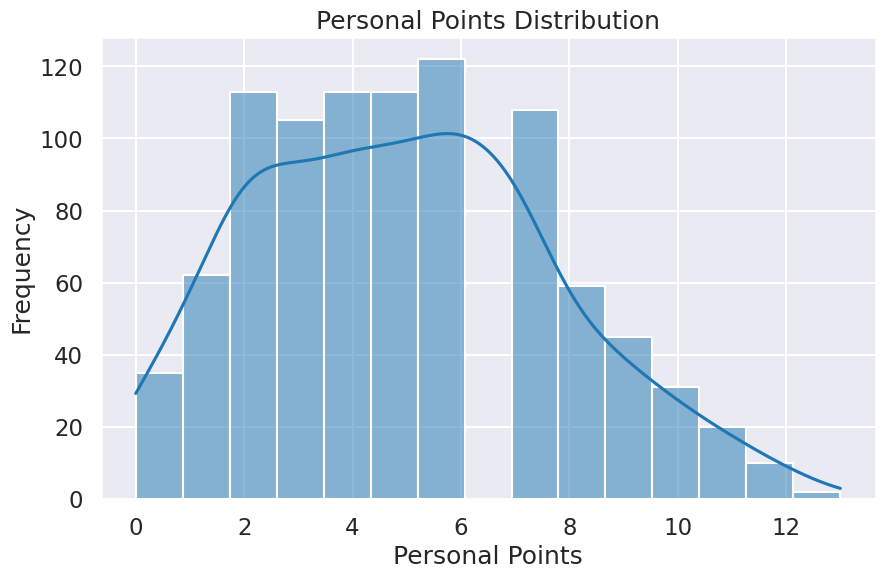

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Personal Points'].dropna(), bins=15, kde=True)
plt.title('Personal Points Distribution')
plt.xlabel('Personal Points')
plt.ylabel('Frequency')
plt.show()


# Filtering Recipes Based on Calories and Personal Points

In [ ]:
def get_recipes(calorie_min, calorie_max, points_min, points_max):
    filtered_df = df[(df['Calories'] >= calorie_min) & (df['Calories'] <= calorie_max) &
                     (df['Personal Points'] >= points_min) & (df['Personal Points'] <= points_max)]
    sorted_df = filtered_df.sort_values(by='Calories').head(10)
    return sorted_df

calorie_min = int(input("Enter minimum calories: "))
calorie_max = int(input("Enter maximum calories: "))
points_min = int(input("Enter minimum personal points: "))
points_max = int(input("Enter maximum personal points: "))

recipes = get_recipes(calorie_min, calorie_max, points_min, points_max)
print("\n")
print("Top 10 recipes:")
for index, row in recipes.iterrows():
    print(f"Name: {row['Name']}")
    display(Image(url=row['Image']))
    print(f"Calories: {row['Calories']}")
    print(f"Summary: {row['Summary']}")
    print("\n")


Enter minimum calories: 1
Enter maximum calories: 3000
Enter minimum personal points: 1
Enter maximum personal points: 16


Top 10 recipes:
Name: Virgin Bloody Mary


Calories: 33.0
Summary: Craving a Bloody Mary but doing a dry challenge? Make this Virgin Bloody Mary, also known as the Virgin Mary, and you won’t miss the vodka!


Name: Turkey Gravy


Calories: 33.0
Summary: This homemade Turkey Gravy from stock is my mom’s tried and true recipe. It’s a staple on our Thanksgiving table every year.


Name: Apple Butter


Calories: 34.0
Summary: This easy apple butter recipe simmers on the stove, made with apples, cinnamon, nutmeg, and allspice, it smells and tastes like fall!


Name: Spinach and Bacon Stuffed Mushrooms


Calories: 34.5
Summary: The stuffing is so good, I could eat it by the spoonful! More mushroom appetizers you might also like Philly Cheesesteak Stuffed Mushrooms, Mushroom Ceviche or Lasagna Stuffed Mushrooms.


Name: Buffalo Chicken Meatballs


Calories: 37.0
Summary: These healthy buffalo chicken meatballs are a great option for a weeknight dinner, game day snack, or party appetizer. Serve them with celery sticks and blue cheese dressing for dipping, or enjoy them on their own.


Name: Mango-Raspberry Fruit Roll Ups


Calories: 39.0
Summary: Homemade Mango-Raspberry Fruit Roll Ups, so much healthier than the store-bought kind, and with much less added sugar.


Name: Pumpkin Butter


Calories: 42.0
Summary: Pumpkin lovers will love this easy, pumpkin butter recipe made from scratch. It’s like pumpkin pie in a jar, only better! Delicious smeared on toast, oatmeal, yogurt, and more!


Name: Whole Roasted Baby Cauliflower


Calories: 46.5
Summary: This simple, Whole Roasted Baby Cauliflower is perfectly charred on the outside and tender in the middle. Made with just four ingredients – salted water, extra-virgin olive oil, coarse sea salt—and cauliflower.


Name: Perfectly Grilled Zucchini Recipe


Calories: 48.0
Summary: Make Perfectly Grilled Zucchini all summer long! Quick and easy, great as a side dish with anything you’re grilling.


Name: Bruschetta with Tomato and Basil


Calories: 49.6
Summary: Bruschetta with Tomato and Basil, one of my favorite ways to use up all my summer tomatoes is with this simple appetizer or side dish.


